<a href="https://colab.research.google.com/github/klleung72781/fintech_project_2/blob/jarvis/TSLA_RNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline


from datetime import datetime, timedelta


from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

In [276]:
url = 'https://raw.githubusercontent.com/klleung72781/fintech_project_2/main/TSLA_DATE_CLOSE.csv'
df = pd.read_csv(url, parse_dates=True, index_col='Date', infer_datetime_format=True)
df = df.sort_index()

In [277]:
# Drop NAs and calculate daily percent return
df['Daily_return'] = df['Close'].dropna().pct_change()
df.head()

,Close,Daily_return
Date,,
2010-06-29,4.78,NaN
2010-06-30,4.77,-0.002092
2010-07-01,4.39,-0.079665
2010-07-02,3.84,-0.125285
2010-07-06,3.22,-0.161458


In [278]:
#Creating DataFrame with returns and Actual Value
daily_df = df.copy().drop(columns=["Close"])
daily_df["Actual_Value"] = np.where(df['Daily_return'] > 0 ,1, 0)
daily_df.dropna().head(10)

,Daily_return,Actual_Value
Date,,
2010-06-30,-0.002092,0
2010-07-01,-0.079665,0
2010-07-02,-0.125285,0
2010-07-06,-0.161458,0
2010-07-07,-0.018634,0
2010-07-08,0.104430,1
2010-07-09,-0.002865,0
2010-07-12,-0.020115,0
2010-07-13,0.064516,1


In [279]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
df['fast_close'] = df['Close'].ewm(halflife=short_window).mean()
df['slow_close'] = df['Close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
df['crossover_long'] = np.where(df['fast_close'] > df['slow_close'], 1.0, 0.0)
df['crossover_short'] = np.where(df['fast_close'] < df['slow_close'], -1.0, 0.0)
df['crossover_signal'] = df['crossover_long'] + df['crossover_short']

df.head()

,Close,Daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
Date,,,,,,,
2010-06-29,4.78,NaN,4.780000,4.780000,0.0,0.0,0.0
2010-06-30,4.77,-0.002092,4.773333,4.774827,0.0,-1.0,-1.0
2010-07-01,4.39,-0.079665,4.554286,4.637564,0.0,-1.0,-1.0
2010-07-02,3.84,-0.125285,4.173333,4.416989,0.0,-1.0,-1.0
2010-07-06,3.22,-0.161458,3.681290,4.143310,0.0,-1.0,-1.0


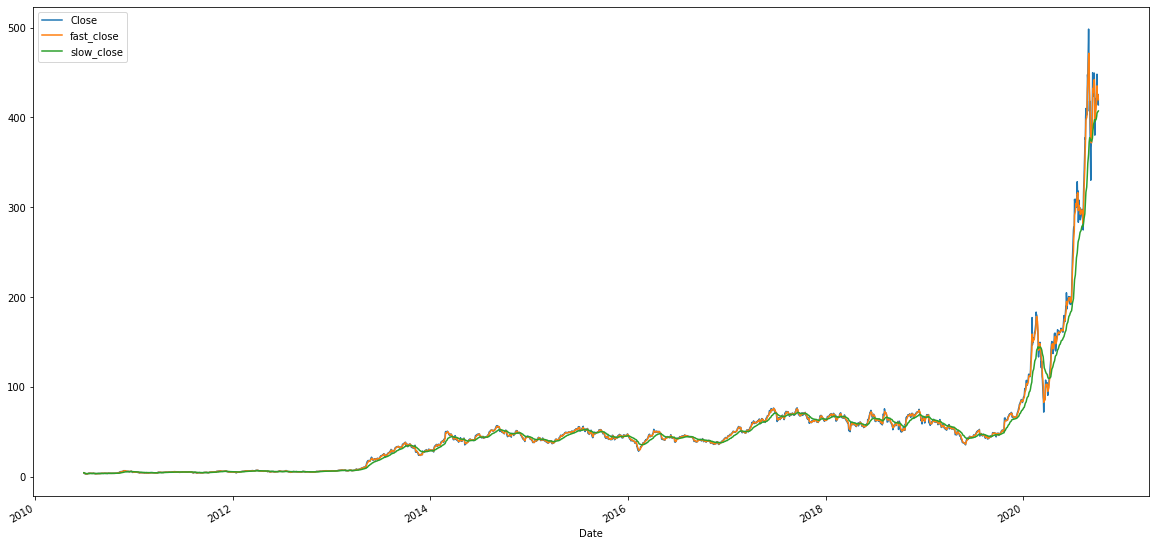

In [280]:
# Plot the EMA of BTC/USD closing prices
df[['Close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

In [282]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
df['fast_vol'] = df['Daily_return'].ewm(halflife=short_vol_window).std()
df['slow_vol'] = df['Daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
df['vol_trend_long'] = np.where(df['fast_vol'] < df['slow_vol'], 1.0, 0.0)
df['vol_trend_short'] = np.where(df['fast_vol'] > df['slow_vol'], -1.0, 0.0) 
df['vol_trend_signal'] = df['vol_trend_long'] + df['vol_trend_short']

df

,Close,Daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
Date,,,,,,,,,,,,
2010-06-29,4.78,NaN,4.780000,4.780000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2010-06-30,4.77,-0.002092,4.773333,4.774827,0.0,-1.0,-1.0,NaN,NaN,0.0,0.0,0.0
2010-07-01,4.39,-0.079665,4.554286,4.637564,0.0,-1.0,-1.0,0.054852,0.054852,0.0,0.0,0.0
2010-07-02,3.84,-0.125285,4.173333,4.416989,0.0,-1.0,-1.0,0.056502,0.061893,1.0,0.0,1.0
2010-07-06,3.22,-0.161458,3.681290,4.143310,0.0,-1.0,-1.0,0.056156,0.067903,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,448.16,0.044638,435.185894,404.714100,1.0,0.0,1.0,0.026227,0.062329,1.0,0.0,1.0
2020-10-02,415.09,-0.073791,425.137947,405.408943,1.0,0.0,1.0,0.066599,0.063866,0.0,-1.0,-1.0
2020-10-05,425.68,0.025513,425.408974,406.766435,1.0,0.0,1.0,0.055216,0.061924,1.0,0.0,1.0


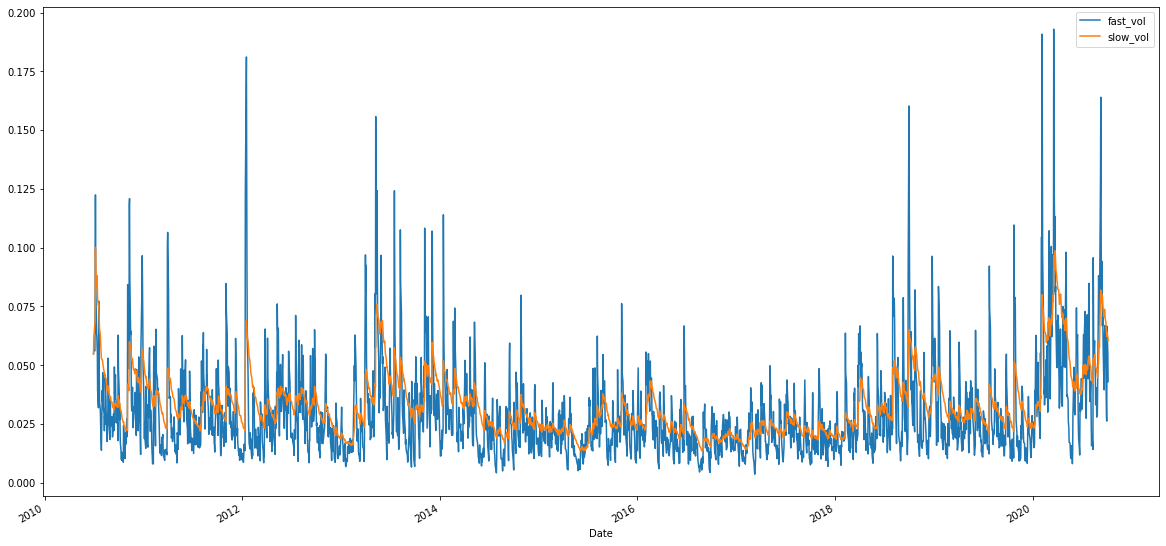

In [283]:
# Plot the EMA of BTC/USD daily return volatility
df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))

In [284]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
df['bollinger_mid_band'] = df['Close'].rolling(window=bollinger_window).mean()
df['bollinger_std'] = df['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
df['bollinger_upper_band']  = df['bollinger_mid_band'] + (df['bollinger_std'] * 2)
df['bollinger_lower_band']  = df['bollinger_mid_band'] - (df['bollinger_std'] * 2)

# Calculate bollinger band trading signal
df['bollinger_long'] = np.where(df['Close'] < df['bollinger_lower_band'], 1.0, 0.0)
df['bollinger_short'] = np.where(df['Close'] > df['bollinger_upper_band'], -1.0, 0.0)
df['bollinger_signal'] = df['bollinger_long'] + df['bollinger_short']

df

,Close,Daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,
2010-06-29,4.78,NaN,4.780000,4.780000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-06-30,4.77,-0.002092,4.773333,4.774827,0.0,-1.0,-1.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-01,4.39,-0.079665,4.554286,4.637564,0.0,-1.0,-1.0,0.054852,0.054852,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-02,3.84,-0.125285,4.173333,4.416989,0.0,-1.0,-1.0,0.056502,0.061893,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-06,3.22,-0.161458,3.681290,4.143310,0.0,-1.0,-1.0,0.056156,0.067903,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,448.16,0.044638,435.185894,404.714100,1.0,0.0,1.0,0.026227,0.062329,1.0,0.0,1.0,410.4570,32.679169,475.815338,345.098662,0.0,0.0,0.0
2020-10-02,415.09,-0.073791,425.137947,405.408943,1.0,0.0,1.0,0.066599,0.063866,0.0,-1.0,-1.0,410.8615,32.684195,476.229890,345.493110,0.0,0.0,0.0
2020-10-05,425.68,0.025513,425.408974,406.766435,1.0,0.0,1.0,0.055216,0.061924,1.0,0.0,1.0,411.2295,32.813769,476.857038,345.601962,0.0,0.0,0.0


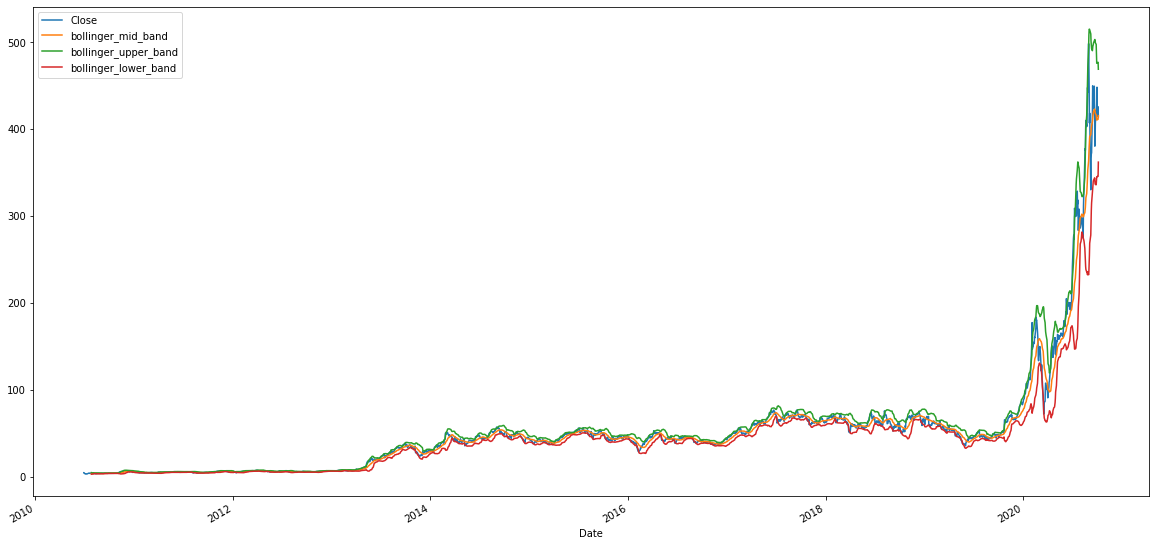

In [285]:
# Plot the Bollinger Bands for BTC/USD closing prices
df[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [286]:
trading_signals_df = df
trading_signals_df.dropna().head()

,Close,Daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,
2010-07-27,4.11,-0.019093,4.152641,4.005498,1.0,0.0,1.0,0.024638,0.060039,1.0,0.0,1.0,3.9745,0.459925,4.894351,3.054649,0.0,0.0,0.0
2010-07-28,4.14,0.007299,4.146321,4.017245,1.0,0.0,1.0,0.020372,0.057264,1.0,0.0,1.0,3.9425,0.421599,4.785699,3.099301,0.0,0.0,0.0
2010-07-29,4.07,-0.016908,4.108160,4.021761,1.0,0.0,1.0,0.017280,0.054892,1.0,0.0,1.0,3.9075,0.375862,4.659224,3.155776,0.0,0.0,0.0
2010-07-30,3.99,-0.019656,4.049080,4.019092,1.0,0.0,1.0,0.013819,0.052724,1.0,0.0,1.0,3.8875,0.359105,4.605710,3.169290,0.0,0.0,0.0
2010-08-02,4.18,0.047619,4.114540,4.032386,1.0,0.0,1.0,0.039207,0.052384,1.0,0.0,1.0,3.9045,0.364742,4.633984,3.175016,0.0,0.0,0.0


In [287]:
# Set x variable list of features
x_var_list = ['crossover_signal', 'vol_trend_signal', 'bollinger_signal']

# Filter by x-variable list
trading_signals_df[x_var_list].tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2020-10-01,1.0,1.0,0.0
2020-10-02,1.0,-1.0,0.0
2020-10-05,1.0,1.0,0.0
2020-10-06,1.0,1.0,0.0
NaT,1.0,1.0,0.0


In [288]:
# Shift DataFrame values by 1
trading_signals_df[x_var_list] = trading_signals_df[x_var_list].shift(1)
trading_signals_df[x_var_list].tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2020-10-01,1.0,1.0,0.0
2020-10-02,1.0,1.0,0.0
2020-10-05,1.0,-1.0,0.0
2020-10-06,1.0,1.0,0.0
NaT,1.0,1.0,0.0


In [289]:
# Drop NAs and replace positive/negative infinity values   (3rd  line important for replacing bad outcomes in cells from certain calculations-do everytime)
trading_signals_df.dropna(subset=x_var_list, inplace=True)
trading_signals_df.dropna(subset=['Daily_return'], inplace=True)
trading_signals_df = df.replace([np.inf, -np.inf], np.nan)
trading_signals_df.head()

,Close,Daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,
2010-06-30,4.77,-0.002092,4.773333,4.774827,0.0,-1.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-01,4.39,-0.079665,4.554286,4.637564,0.0,-1.0,-1.0,0.054852,0.054852,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-02,3.84,-0.125285,4.173333,4.416989,0.0,-1.0,-1.0,0.056502,0.061893,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-06,3.22,-0.161458,3.681290,4.143310,0.0,-1.0,-1.0,0.056156,0.067903,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-07,3.16,-0.018634,3.416508,3.949775,0.0,-1.0,-1.0,0.079353,0.068411,0.0,-1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [290]:
# Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
trading_signals_df['Positive Return'] = np.where(df['Daily_return'] > 0, 1.0, 0.0)
df

,Close,Daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,
2010-06-30,4.77,-0.002092,4.773333,4.774827,0.0,-1.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-01,4.39,-0.079665,4.554286,4.637564,0.0,-1.0,-1.0,0.054852,0.054852,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-02,3.84,-0.125285,4.173333,4.416989,0.0,-1.0,-1.0,0.056502,0.061893,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-06,3.22,-0.161458,3.681290,4.143310,0.0,-1.0,-1.0,0.056156,0.067903,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2010-07-07,3.16,-0.018634,3.416508,3.949775,0.0,-1.0,-1.0,0.079353,0.068411,0.0,-1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30,429.01,0.023719,422.211788,401.595837,1.0,0.0,1.0,0.028105,0.063780,1.0,0.0,1.0,410.4175,32.631641,475.680782,345.154218,0.0,0.0,0.0
2020-10-01,448.16,0.044638,435.185894,404.714100,1.0,0.0,1.0,0.026227,0.062329,1.0,0.0,1.0,410.4570,32.679169,475.815338,345.098662,0.0,0.0,0.0
2020-10-02,415.09,-0.073791,425.137947,405.408943,1.0,0.0,1.0,0.066599,0.063866,0.0,-1.0,1.0,410.8615,32.684195,476.229890,345.493110,0.0,0.0,0.0


In [291]:
# Construct training start and end dates
training_start = df.index.min().strftime(format= '%Y-%m-%d')
training_end = '2019-10-04'

# Construct testing start and end dates
testing_start =  '2019-10-07'
testing_end = df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2010-06-30
Training End: 2019-10-04
Testing Start: 2019-10-07
Testing End: 2020-10-06


In [292]:
# Construct the X_train and y_train datasets
X_train = trading_signals_df[x_var_list][training_start:training_end]
y_train = trading_signals_df['Positive Return'][training_start:training_end]

X_train.tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2019-09-30,1.0,-1.0,0.0
2019-10-01,1.0,-1.0,0.0
2019-10-02,1.0,1.0,0.0
2019-10-03,1.0,1.0,0.0
2019-10-04,1.0,-1.0,0.0


In [293]:
# Construct the X test and y test datasets
X_test = trading_signals_df[x_var_list][testing_start:testing_end]
y_test = trading_signals_df['Positive Return'][testing_start:testing_end]

X_test.tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2020-09-30,1.0,1.0,0.0
2020-10-01,1.0,1.0,0.0
2020-10-02,1.0,1.0,0.0
2020-10-05,1.0,-1.0,0.0
2020-10-06,1.0,1.0,0.0


In [294]:
y_test

Date
2019-10-07    1.0
2019-10-08    1.0
2019-10-09    1.0
2019-10-10    1.0
2019-10-11    1.0
             ... 
2020-09-30    1.0
2020-10-01    1.0
2020-10-02    0.0
2020-10-05    1.0
2020-10-06    0.0
Name: Positive Return, Length: 253, dtype: float64

In [295]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [296]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train): (n_est = number of tress, depth is depth in each tree)
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = predictions
Results

,Positive Return,Predicted Value
Date,,
2019-10-07,1.0,1.0
2019-10-08,1.0,0.0
2019-10-09,1.0,1.0
2019-10-10,1.0,1.0
2019-10-11,1.0,1.0
...,...,...
2020-09-30,1.0,1.0
2020-10-01,1.0,1.0
2020-10-02,0.0,1.0


In [297]:
# Save the pre-trained model
from joblib import dump, load
dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [298]:
X_test.head()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2019-10-07,-1.0,1.0,0.0
2019-10-08,1.0,-1.0,0.0
2019-10-09,1.0,1.0,0.0
2019-10-10,1.0,1.0,0.0
2019-10-11,1.0,1.0,0.0


In [299]:
# Set index as datetime object and drop extraneous columns
daily_df.set_index(pd.to_datetime(daily_df.index, infer_datetime_format=True), inplace=True)
daily_df.sort_index()
#df.drop(columns=['index'], inplace=True)


daily_df.dropna(inplace=True)
daily_df.head()

,Daily_return,Actual_Value
Date,,
2010-06-30,-0.002092,0
2010-07-01,-0.079665,0
2010-07-02,-0.125285,0
2010-07-06,-0.161458,0
2010-07-07,-0.018634,0


In [300]:
daily_df.tail()

,Daily_return,Actual_Value
Date,,
2020-09-30,0.023719,1
2020-10-01,0.044638,1
2020-10-02,-0.073791,0
2020-10-05,0.025513,1
2020-10-06,-0.027485,0


In [301]:
daily_df = daily_df.iloc[-253:] 
daily_df

,Daily_return,Actual_Value
Date,,
2019-10-07,0.027004,1
2019-10-08,0.009886,1
2019-10-09,0.018746,1
2019-10-10,0.000818,1
2019-10-11,0.012870,1
...,...,...
2020-09-30,0.023719,1
2020-10-01,0.044638,1
2020-10-02,-0.073791,0


In [302]:
predictions = model.predict(X_test)
predictions

array([1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1.

In [303]:
# Add predicted results to DataFrame
daily_df["Predicted_Value"] = predictions
daily_df

,Daily_return,Actual_Value,Predicted_Value
Date,,,
2019-10-07,0.027004,1,1.0
2019-10-08,0.009886,1,0.0
2019-10-09,0.018746,1,1.0
2019-10-10,0.000818,1,1.0
2019-10-11,0.012870,1,1.0
...,...,...,...
2020-09-30,0.023719,1,1.0
2020-10-01,0.044638,1,1.0
2020-10-02,-0.073791,0,1.0


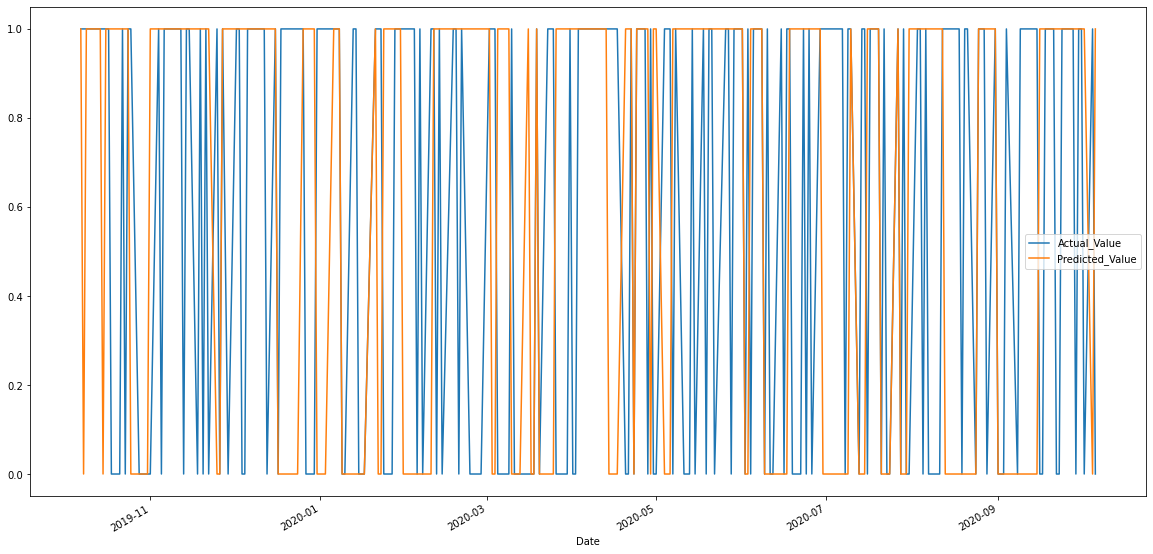

In [305]:
# Plot predicted results vs. actual results
daily_df[['Actual_Value', 'Predicted_Value']].plot(figsize=(20,10))

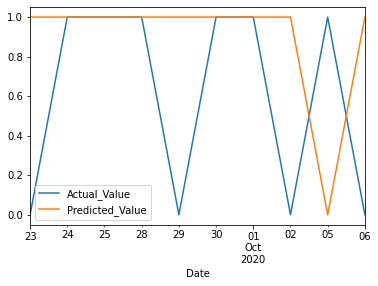

In [307]:
# Plot last 10 records of predicted vs. actual results
daily_df[['Actual_Value', 'Predicted_Value']].tail(10).plot()

In [310]:
# Replace predicted values 0 to -1 to account for shorting
daily_df['Predicted_Value'].replace(0, -1, inplace=True)
daily_df

,Daily_return,Actual_Value,Predicted_Value
Date,,,
2019-10-07,0.027004,1,1.0
2019-10-08,0.009886,1,-1.0
2019-10-09,0.018746,1,1.0
2019-10-10,0.000818,1,1.0
2019-10-11,0.012870,1,1.0
...,...,...,...
2020-09-30,0.023719,1,1.0
2020-10-01,0.044638,1,1.0
2020-10-02,-0.073791,0,1.0


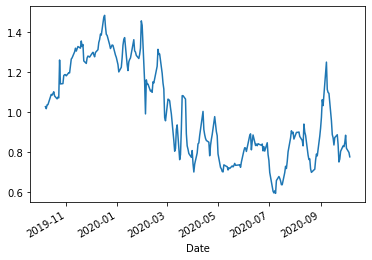

In [313]:
# Calculate cumulative return of model and plot the result
(1 + (daily_df['Daily_return'] * daily_df['Predicted_Value'])).cumprod().plot()

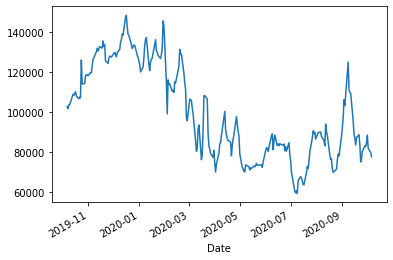

In [316]:
# Set initial capital allocation
initial_capital = 100000

# Plot cumulative return of model in terms of capital
cumulative_return_capital = initial_capital * (1 + (daily_df['Daily_return'] * daily_df['Predicted_Value'])).cumprod()
cumulative_return_capital.plot()